**SIMULATION DES FILES D'ATTENTE**

In [19]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np

**Generation des dates d'arrivé et les temps de traitement**

afin de simuler les modeles de file d'attente *M/M/s* (*M/M/1* inclu) et *M/M/s/L*, nous allons dans un premier temps generer les des nombres aleatoire suivant la loi de POISSON pour les durrés inter arrivées et des nombres aleatoires suivant une loi exponentielle pour les durré de traitement, nous allons aussi initialiser une liste de serveurs (guichets) a vide.

In [20]:
S = 3
L = 10
lam = 2
mu = 5


Inter = np.random.poisson(2,100) #  contient les intervalles de temps entre les arrivée des clients 
Dates = np.cumsum(Inter) # en cumulant on retrouve les dates d'arrivées
Periods = np.random.exponential(5,100) #  contient les durrées de services

Liste des dates d'arrivées des clients :

In [21]:
print(Dates)

[  3   4   5   5   7  10  13  13  15  15  16  16  19  20  21  27  31  31
  35  35  38  39  40  41  43  46  48  51  52  52  53  53  53  55  58  59
  61  63  63  64  67  71  73  74  75  76  80  80  82  86  88  89  95  97
  99 102 104 104 105 107 108 111 113 117 119 123 126 130 131 131 133 133
 138 141 145 148 151 152 153 155 159 163 165 166 169 173 177 179 179 181
 182 184 188 191 192 193 194 195 197 199]


Liste des temps de traitement de chaque client :

In [22]:
print(Periods)

[19.89557973  1.56442551  3.18078711 10.39239444  0.05132243  4.87523161
  7.51925841 10.0121483   1.23451947  0.83780935  1.96901023  7.92080073
  0.47042271  0.60017736  3.82817441  0.99102026 18.01292376  1.56455961
  3.08740856 21.722492    6.64074013  1.13817184 13.60614229  0.08134885
 20.2562964  11.3853962   9.08538573  0.93441176  0.12201795  1.76962013
  3.63502916  0.8709582   1.27668701  2.07193398 13.23786339  1.36684186
  0.38020819  2.20303446  3.82103905 12.54478429  2.21376231  6.51428244
  7.56148674 17.4397201   5.36255084 10.43117215 23.04612631  7.33252377
  3.98806412  0.30817982  0.38165854  1.79316996  2.90405443  0.7972126
 13.82780923  8.04662834  5.44197902  3.63054621  3.09077752  3.82472868
  0.8576534   4.8612181   5.66437657  0.62710708  4.06292319  3.06980619
  2.94077655  5.83345871  3.81892378  3.27750177  2.47976629  9.20281843
  9.17460938  4.52880942  4.23920462 10.28944178  2.85249306  9.6732556
  5.94855504 14.29292886  3.12991716  2.68818488  2.8

les durrées séparant deux arrivées suivent une loi de POISSON de parametre (lam= 2 dans cet example) 

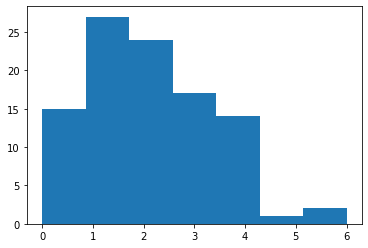

In [23]:
plt.hist(Inter,bins = 7)
plt.show()

L'histograme suivent peut etre vu comme le nombre d'arrivées des client dans chaque instant t durant le déroulement de la simulation.

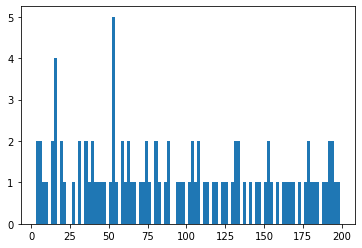

In [24]:
plt.hist(Dates,bins =100)
plt.show()

les temps de traitements suivent une loi expo de parametre (mu = 5 dans cet exemple)

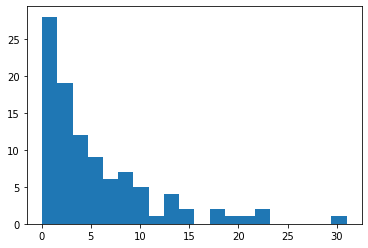

In [25]:
plt.hist(Periods,bins = 20)
plt.show()

**M/M/s**

Le systeme *M/M/s* est caracterisé par une capacité illimité de la file d'attente. 

In [26]:
Deroul = [[],[]] ; Deroul[0].append(0); Deroul[1].append(0) ; encours = 0 #liste uutilisé dans la visualisation
servers = [[0,0] for i in range(S)] # S (=3) represente l'ensemble des serveurs du systeme (reste du temps a traiter + la date dans la quelle le traitement a commencer)
T = Dates
P = Periods
t=0
temps = 0
encours=1
while (len(T)>0): # tant que tout les client ne sont pas servi
  if (t>=T[0]): # si le prochain element est considéré pret (entré dans la file)  
    prd = [i for i,j in servers]
    temps = min(prd) # on trouve le prochain a faire sortir du systeme (traitement fini)
    t += temps # le temps de sont traitement s'ajoute a la variable t qui represente le deroulement pas a pas 
    i = prd.index(temps)
    encours = 0
    for s,l in enumerate(servers): # soustraire autres clients en phase de traitement le temps ecoulé 
      if (servers[s][0] -  temps < 0) : servers[s][0] =  0 ;  servers[s][1] =  0
      else : servers[s][0] -=  temps; encours += 1
    servers[i] = [P[0],t] # faire entrer le prochain dans la liste
    P = P[1:] # le suprimer de la liste P
    T = T[1:] # le suprimer de la liste T
  else: # sil n'est pas considéré comme pret on avance le temps jusqu'a ce quil soit pret et on corrige les durrée de traitement dans les serveurs
    t_prec = t
    t=T[0] 
    for s,l in enumerate(servers):
       if (servers[s][0] - (t-t_prec) < 0) : servers[s][0] =  0
       else : servers[s][0] -=  (t-t_prec) 
  k=0
  for cl in T: # Calculer le nombre de client en attente dans la file
    if (cl<=t) : k+=1
  Deroul[0].append(t);Deroul[1].append(k+encours)
  print('A l\'instant t = ',t)
  print('services en cours: ',servers)
  print(T)
  print(P) 
  print()    

encours = S  
while encours !=0 :  
  prd = [i for i,j in servers]
  temps = min(prd) 
  t += temps
  encours = 0
  for s,l in enumerate(servers):
    if (servers[s][0] -  temps <= 0) : servers[s][0] =  0 ;  servers[s][1] =  0; del(servers[s])
    else : servers[s][0] -=  temps ; encours += 1
  Deroul[0].append(t);Deroul[1].append(encours)


A l'instant t =  3
services en cours:  [[0, 0], [0, 0], [0, 0]]
[  3   4   5   5   7  10  13  13  15  15  16  16  19  20  21  27  31  31
  35  35  38  39  40  41  43  46  48  51  52  52  53  53  53  55  58  59
  61  63  63  64  67  71  73  74  75  76  80  80  82  86  88  89  95  97
  99 102 104 104 105 107 108 111 113 117 119 123 126 130 131 131 133 133
 138 141 145 148 151 152 153 155 159 163 165 166 169 173 177 179 179 181
 182 184 188 191 192 193 194 195 197 199]
[19.89557973  1.56442551  3.18078711 10.39239444  0.05132243  4.87523161
  7.51925841 10.0121483   1.23451947  0.83780935  1.96901023  7.92080073
  0.47042271  0.60017736  3.82817441  0.99102026 18.01292376  1.56455961
  3.08740856 21.722492    6.64074013  1.13817184 13.60614229  0.08134885
 20.2562964  11.3853962   9.08538573  0.93441176  0.12201795  1.76962013
  3.63502916  0.8709582   1.27668701  2.07193398 13.23786339  1.36684186
  0.38020819  2.20303446  3.82103905 12.54478429  2.21376231  6.51428244
  7.56148674 17.43

Nombre de client dans le systeme durant tout le déroulement

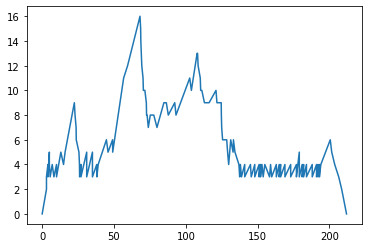

In [27]:
plt.plot(Deroul[0],Deroul[1])
plt.show()

**M/M/1**

Soit dans le cas ou S = 1 :

In [66]:
Deroul = [[],[]] ; Deroul[0].append(0); Deroul[1].append(0) ; encours = 0 #liste uutilisé dans la visualisation
servers = [[0,0]]
T = Dates
P = Periods
t=0
temps = 0
while (len(T)>0): # tant que tout les client ne sont pas servi
  if (t>=T[0]): # si le prochain element est considéré pret (entré dans la file)  
    prd = [i for i,j in servers]
    temps = min(prd) # on trouve le prochain a faire sortir du systeme (traitement fini)
    t += temps # le temps de sont traitement s'ajoute a la variable t qui represente le deroulement pas a pas 
    i = prd.index(temps)
    encours = 0
    for s,l in enumerate(servers): # soustraire autres clients en phase de traitement le temps ecoulé 
      if (servers[s][0] -  temps <= 0) : servers[s][0] =  0 ;  servers[s][1] =  0;
      else : servers[s][0] -=  temps ; encours += 1
    servers[i] = [P[0],t] # faire entrer le prochain dans la liste
    P = P[1:] # le suprimer de la liste P
    T = T[1:] # le suprimer de la liste T
  else: # sil n'est pas considéré comme pret on avance le temps jusqu'a ce quil soit pret et on corrige les durrée de traitement dans les serveurs
    t_prec = t
    t=T[0] 
    for s,l in enumerate(servers):
       if (servers[s][0] - (t-t_prec) < 0) : servers[s][0] =  0
       else : servers[s][0] -=  (t-t_prec) 
  k=0
  for cl in T: # Calculer le nombre de client en attente dans la file
    if (cl<t) : k+=1
  Deroul[0].append(t);Deroul[1].append(k+encours)
  print('A l\'instant t = ',t)
  print('services en cours: ',servers)
  print(T)
  print(P) 
  print() 

encours = S  
while encours !=0 :  
  prd = [i for i,j in servers]
  temps = min(prd) 
  t += temps
  encours = 0
  for s,l in enumerate(servers):
    if (servers[s][0] -  temps <= 0) : servers[s][0] =  0 ;  servers[s][1] =  0
    else : servers[s][0] -=  temps ; encours += 1
  Deroul[0].append(t);Deroul[1].append(encours)

A l'instant t =  3
services en cours:  [[0, 0]]
[  3   4   5   5   7  10  13  13  15  15  16  16  19  20  21  27  31  31
  35  35  38  39  40  41  43  46  48  51  52  52  53  53  53  55  58  59
  61  63  63  64  67  71  73  74  75  76  80  80  82  86  88  89  95  97
  99 102 104 104 105 107 108 111 113 117 119 123 126 130 131 131 133 133
 138 141 145 148 151 152 153 155 159 163 165 166 169 173 177 179 179 181
 182 184 188 191 192 193 194 195 197 199]
[19.89557973  1.56442551  3.18078711 10.39239444  0.05132243  4.87523161
  7.51925841 10.0121483   1.23451947  0.83780935  1.96901023  7.92080073
  0.47042271  0.60017736  3.82817441  0.99102026 18.01292376  1.56455961
  3.08740856 21.722492    6.64074013  1.13817184 13.60614229  0.08134885
 20.2562964  11.3853962   9.08538573  0.93441176  0.12201795  1.76962013
  3.63502916  0.8709582   1.27668701  2.07193398 13.23786339  1.36684186
  0.38020819  2.20303446  3.82103905 12.54478429  2.21376231  6.51428244
  7.56148674 17.4397201   5.362550

Nombre de client dans le systeme durant tout le déroulement

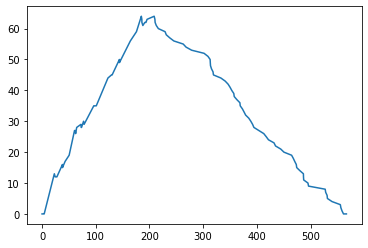

In [46]:
plt.plot(Deroul[0],Deroul[1])
plt.show()

In [67]:
#s = sum(Deroul[1])
#s / Deroul[0][-1] # le nombre moyen de client dans le systeme selon la simulation !!!
#Deroul[1]

[0,
 0,
 0,
 0,
 13,
 12,
 12,
 16,
 15,
 17,
 19,
 27,
 27,
 26,
 28,
 29,
 28,
 28,
 30,
 29,
 35,
 35,
 35,
 44,
 45,
 45,
 50,
 49,
 56,
 59,
 64,
 63,
 62,
 61,
 62,
 62,
 62,
 63,
 64,
 63,
 62,
 61,
 60,
 59,
 58,
 57,
 56,
 55,
 54,
 53,
 52,
 51,
 50,
 49,
 48,
 47,
 46,
 45,
 44,
 43,
 42,
 41,
 40,
 39,
 38,
 37,
 36,
 35,
 34,
 33,
 32,
 31,
 30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1,
 0,
 0]

**Caracteristiques de la FA :** dans le cas ou s = 1

In [71]:
rau = lam / mu
#ns = np.round(lam / (mu - lam)) 
nf = np.ceil(lam**2 / (mu*(mu - lam)))
ns = np.ceil(nf + lam / mu)
ts = 1/(mu - lam)
tf = lam / (mu*(mu - lam))
print(ns,nf,ts,tf)

0.6666666666666667
2.0 1.0 0.3333333333333333 0.13333333333333333


**M/M/s/L**

Le systeme *M/M/s/L* est caracterisé par une capacité limité de la source, ie. la file d'attente est limité, les clients sont rejetés si la file est pleine.

In [31]:
Deroul = [[],[]] ; Deroul[0].append(0); Deroul[1].append(0) ; encours = 0 #liste uutilisé dans la visualisation
servers = [[0,0] for i in range(S)] # S (=3) represente l'ensemble des serveurs du systeme (reste du temps a traiter + la date dans la quelle le traitement a commencer)
T = Dates
P = Periods
t=0
queue = [T[0]];T=T[1:]
temps = 0
while (len(T)>0) and (len(queue)>0) :
  if len(queue)<L:
    queue.append(T[0])
    T = T[1:]
  else:  
    if (t>=T[0]): T = T[1:]
    if (t>=queue[0]):
      prd = [i for i,j in servers]
      temps = min(prd)
      t += temps 
      i = prd.index(temps)
      encours=0
      for s,l in enumerate(servers):
        if (servers[s][0] -  temps < 0) : servers[s][0] =  0
        else : servers[s][0] -=  temps; encours+=1
      servers[i] = [P[0],t]
      P = P[1:]
      queue = queue[1:]
    else: 
      t_prec = t
      t=queue[0] 
      for s,l in enumerate(servers):
        if (servers[s][0] - (t-t_prec) < 0) : servers[s][0] =  0
        else : servers[s][0] -=  (t-t_prec) 
  k=0
  for cl in queue: # Calculer le nombre de client en attente dans la file
    if (cl<=t) : k+=1
  Deroul[0].append(t);Deroul[1].append(k+encours)
  print('A l\'instant t = ',t)
  print('services en cours: ',servers)
  print(T)
  print(P)
  print(queue)

encours = S  
while encours !=0 :  
  prd = [i for i,j in servers]
  temps = min(prd) 
  t += temps
  encours = 0
  for s,l in enumerate(servers):
    if (servers[s][0] -  temps <= 0) : servers[s][0] =  0 ;  servers[s][1] =  0; del(servers[s])
    else : servers[s][0] -=  temps ; encours += 1
  Deroul[0].append(t);Deroul[1].append(encours)


A l'instant t =  0
services en cours:  [[0, 0], [0, 0], [0, 0]]
[  5   5   7  10  13  13  15  15  16  16  19  20  21  27  31  31  35  35
  38  39  40  41  43  46  48  51  52  52  53  53  53  55  58  59  61  63
  63  64  67  71  73  74  75  76  80  80  82  86  88  89  95  97  99 102
 104 104 105 107 108 111 113 117 119 123 126 130 131 131 133 133 138 141
 145 148 151 152 153 155 159 163 165 166 169 173 177 179 179 181 182 184
 188 191 192 193 194 195 197 199]
[19.89557973  1.56442551  3.18078711 10.39239444  0.05132243  4.87523161
  7.51925841 10.0121483   1.23451947  0.83780935  1.96901023  7.92080073
  0.47042271  0.60017736  3.82817441  0.99102026 18.01292376  1.56455961
  3.08740856 21.722492    6.64074013  1.13817184 13.60614229  0.08134885
 20.2562964  11.3853962   9.08538573  0.93441176  0.12201795  1.76962013
  3.63502916  0.8709582   1.27668701  2.07193398 13.23786339  1.36684186
  0.38020819  2.20303446  3.82103905 12.54478429  2.21376231  6.51428244
  7.56148674 17.4397201   

Nombre de client dans le systeme durant tout le déroulement

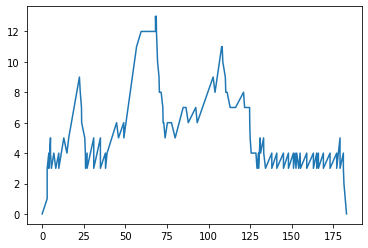

In [32]:
plt.plot(Deroul[0],Deroul[1])
plt.show()

Soit dans le cas ou S = 1 et L = 10 :

In [53]:
Deroul = [[],[]] ; Deroul[0].append(0); Deroul[1].append(0) ; encours = 0 #liste uutilisé dans la visualisation
servers = [[0,0]]
T = Dates
P = Periods
t=0
queue = [T[0]]; T=T[1:]
temps = 0
while (len(T)>0) and (len(queue)>0) :
  if len(queue)<L:
    queue.append(T[0])
    T = T[1:]
  else:  
    if (t>=T[0]): T = T[1:]
    if (t>=queue[0]):
      prd = [i for i,j in servers]
      temps = min(prd)
      t += temps 
      i = prd.index(temps)
      encours = 0
      for s,l in enumerate(servers):
        if (servers[s][0] -  temps < 0) : servers[s][0] =  0
        else : servers[s][0] -=  temps; encours+=1
      servers[i] = [P[0],t]
      P = P[1:]
      queue = queue[1:]
    else: 
      t_prec = t
      t=queue[0] 
      for s,l in enumerate(servers):
        if (servers[s][0] - (t-t_prec) < 0) : servers[s][0] =  0
        else : servers[s][0] -=  (t-t_prec) 
  k=0
  for cl in queue: # Calculer le nombre de client en attente dans la file
    if (cl<=t) : k+=1
  Deroul[0].append(t);Deroul[1].append(k+encours)  
  print('A l\'instant t = ',t)
  print('services en cours: ',servers)
  print(T)
  print(P)
  print(queue)

encours = S  
while encours !=0 :  
  prd = [i for i,j in servers]
  temps = min(prd) 
  t += temps
  encours = 0
  for s,l in enumerate(servers):
    if (servers[s][0] -  temps <= 0) : servers[s][0] =  0 ;  servers[s][1] =  0; del(servers[s])
    else : servers[s][0] -=  temps ; encours += 1
  Deroul[0].append(t);Deroul[1].append(encours)


A l'instant t =  0
services en cours:  [[0, 0]]
[  5   5   7  10  13  13  15  15  16  16  19  20  21  27  31  31  35  35
  38  39  40  41  43  46  48  51  52  52  53  53  53  55  58  59  61  63
  63  64  67  71  73  74  75  76  80  80  82  86  88  89  95  97  99 102
 104 104 105 107 108 111 113 117 119 123 126 130 131 131 133 133 138 141
 145 148 151 152 153 155 159 163 165 166 169 173 177 179 179 181 182 184
 188 191 192 193 194 195 197 199]
[19.89557973  1.56442551  3.18078711 10.39239444  0.05132243  4.87523161
  7.51925841 10.0121483   1.23451947  0.83780935  1.96901023  7.92080073
  0.47042271  0.60017736  3.82817441  0.99102026 18.01292376  1.56455961
  3.08740856 21.722492    6.64074013  1.13817184 13.60614229  0.08134885
 20.2562964  11.3853962   9.08538573  0.93441176  0.12201795  1.76962013
  3.63502916  0.8709582   1.27668701  2.07193398 13.23786339  1.36684186
  0.38020819  2.20303446  3.82103905 12.54478429  2.21376231  6.51428244
  7.56148674 17.4397201   5.36255084 10.43

Nombre de client dans le systeme durant tout le déroulement

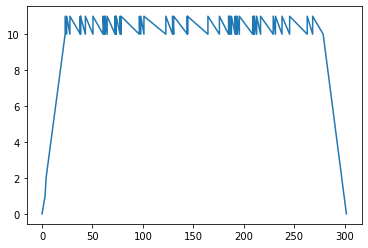

In [34]:
plt.plot(Deroul[0],Deroul[1])
plt.show()

In [54]:
#s = sum(Deroul[1])
#s / Deroul[0][-1] # le nombre moyen de client dans le systeme selon la simulation !!!

3.181679067333683

**Caracteristiques de la FA :** cas M/M/1/L

In [39]:
rau = lam / mu
if (lam == mu):
  PL = 1/L+1
  ns = L/2
else:
  PL = ((1-mu)*(mu**L))/(1-mu**(L+1)) 
  ns = (mu/1-mu)-(( (L+1)*mu**(L+1)) / (1-mu**(L+1))) 


nf = ns - mu*(1-PL)
tf = nf/(lam*(1-PL))
ts = tf + 1/mu
print(ns,nf,ts,tf)

11.000000225280004 10.000000307200006 25.200002816000282 25.000002816000283
